
# Project: Investigate a Dataset ("tmdb-movies")

## Table of Contents
<ul>
<h1><a href="#dw">Data Wrangling</a></h1>    
<li><a href="#Gather">1_Gathering Data</a></li>
<li><a href="#asses">2_assess data</a></li>     
<li><a href="#clean">3_Data Cleaning</a></li>    
<h1><a href="#eda">Exploratory Data Analysis</a></h1>
<h1><a href="#conclusions">Conclusions</a></h1>
</ul>

<a id='dw'></a>
# Data Wrangling

<a id='Gather'></a>
### 1_Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#Load your data 
movie=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

<a id='asses'></a>
### 2_assess data

In [3]:
#print out a few lines
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#information about data 
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#display the number of rows and columns
movie.shape

(10866, 21)

In [6]:
#display usiful describtive statstics
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#display the number of unique values in each column
movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#display number of duplicated values
movie.duplicated().sum()

1

In [9]:
#display number of null values of each column
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#display the data_type for each column
movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='clean'></a>
### 3_Data Cleaning

In [11]:
#delete the columns that has issues from the data_Frame
movie.drop(["imdb_id","homepage","tagline","vote_count","release_date","keywords","production_companies"],axis=1, inplace=True)

In [12]:
#display the frist line
movie.head(1)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
#delete null_value from the data frame
movie.dropna(inplace=True)

In [14]:
#make sure that there is no null_values
movie.isnull().sum().any()

False

In [15]:
#delete the duplicated_values from the data_frame
movie.drop_duplicates(inplace=True)

In [16]:
#make sure that there is no duplicated_values
movie.duplicated().sum().any()

False

In [17]:
#fix the data type of "release_year" from object to date
movie['release_year'] = pd.to_datetime(movie['release_year'],format="%Y")

In [18]:
# I will using mask make all 0 to np.nan , then fillna with the mean
def replace_0_values (col) :
    movie[col]=movie[col].mask(movie[col]==0).fillna(movie[col].mean())

In [19]:
#display the number of 0 values in "popularity" column for each column
movie[movie["popularity"]==0].count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [20]:
#display the number of 0 values in "budget" column for each column
movie[movie["budget"]==0].count()

id                5576
popularity        5576
budget            5576
revenue           5576
original_title    5576
cast              5576
director          5576
overview          5576
runtime           5576
genres            5576
vote_average      5576
release_year      5576
budget_adj        5576
revenue_adj       5576
dtype: int64

In [21]:
replace_0_values("budget")

In [22]:
#display the number of 0 values in "revenue" column for each column
movie[movie["revenue"]==0].count()

id                5886
popularity        5886
budget            5886
revenue           5886
original_title    5886
cast              5886
director          5886
overview          5886
runtime           5886
genres            5886
vote_average      5886
release_year      5886
budget_adj        5886
revenue_adj       5886
dtype: int64

In [23]:
replace_0_values("revenue")

In [24]:
#display the number of 0 values in "runtime" column for each column
movie[movie["runtime"]==0].count()

id                27
popularity        27
budget            27
revenue           27
original_title    27
cast              27
director          27
overview          27
runtime           27
genres            27
vote_average      27
release_year      27
budget_adj        27
revenue_adj       27
dtype: int64

In [25]:
replace_0_values("runtime")

In [26]:
#display the number of 0 values in "vote_average" column for each column
movie[movie["vote_average"]==0].count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [27]:
#display the number of 0 values in "budget_adj" column for each column
movie[movie["budget_adj"]==0].count()

id                5576
popularity        5576
budget            5576
revenue           5576
original_title    5576
cast              5576
director          5576
overview          5576
runtime           5576
genres            5576
vote_average      5576
release_year      5576
budget_adj        5576
revenue_adj       5576
dtype: int64

In [28]:
replace_0_values("budget_adj")

In [29]:
#display the number of 0 values in "revenue_adj" column for each column
movie[movie["revenue_adj"]==0].count()

id                5886
popularity        5886
budget            5886
revenue           5886
original_title    5886
cast              5886
director          5886
overview          5886
runtime           5886
genres            5886
vote_average      5886
release_year      5886
budget_adj        5886
revenue_adj       5886
dtype: int64

In [30]:
replace_0_values("revenue_adj")

<a id='eda'></a>
# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

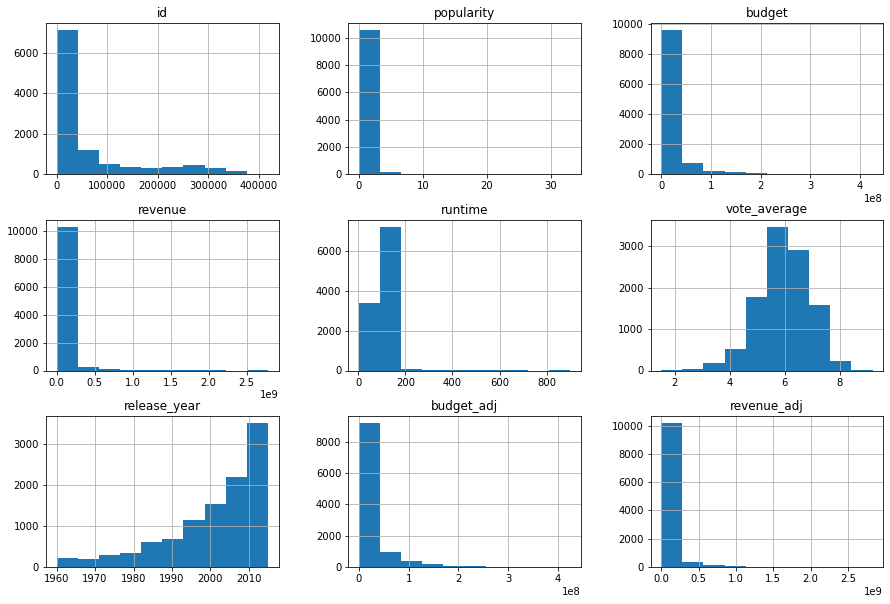

In [31]:
#histogram to explore movie data
movie.hist(figsize = (15,10))

### How much profits that each movie achieve?

In [32]:
movie["profit"]=movie["revenue"]-movie["budget"]

In [33]:
#display the frist line
movie["profit"].head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: profit, dtype: float64

### What is the relationship of the year in which the film was released and its profit ?

In [34]:
#display movies_profit_by_year
movies_profit_by_year=movie.groupby("release_year")["profit"].sum()
movies_profit_by_year.head()

release_year
1960-01-01    7.905858e+08
1961-01-01    8.719434e+08
1962-01-01    8.218727e+08
1963-01-01    8.623661e+08
1964-01-01    1.213632e+09
Name: profit, dtype: float64

Text(0, 0.5, 'movies_profit')

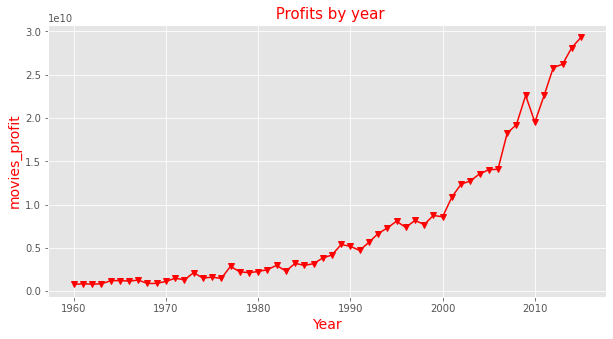

In [35]:
#visualize movies_profit_by_year
#choose the style "ggplot" to the figure
#choose the figure size 
#make a  plot to display movies_profit_by_year by index in x_axis 
# display movies_profit_by_year in y_axis
#give the plot red color , "v" marker ,"--" linestyle 
#give a title to the figure and red color 
#give a label to x_axis and y_axis and red color
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(movies_profit_by_year.index, movies_profit_by_year, color='red',marker="v")
plt.title(' Profits by year', fontsize = 15,color='red')
plt.xlabel('Year', fontsize=14,color='red')
plt.ylabel('movies_profit', fontsize=14,color='red')

###### we notice that Over the years,movies are making a higher profit

### What is the relationship of the year in which the film was released and its budget ?

In [36]:
#display movies_budget_by_year
movies_budget_by_year=movie.groupby("release_year")["budget"].sum()
movies_budget_by_year.head()

release_year
1960-01-01    3.626043e+08
1961-01-01    3.126523e+08
1962-01-01    3.212374e+08
1963-01-01    4.138788e+08
1964-01-01    4.984817e+08
Name: budget, dtype: float64

Text(0, 0.5, 'movies_Budget')

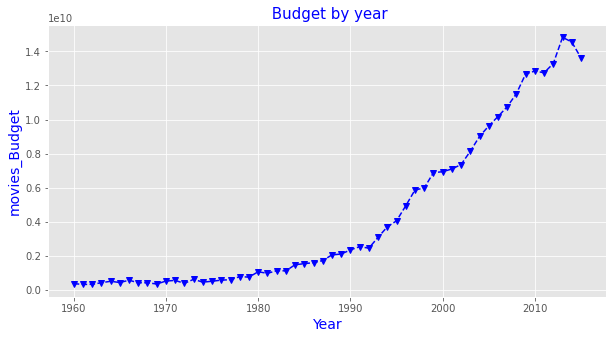

In [37]:
#visualize movies_budget_by_year
#choose the style "ggplot" to the figure
#choose the figure size 
#make a  plot to display movies_budget_by_year by index in x_axis 
# display movies_budget_by_year in y_axis
#give the plot blue color , "v" marker ,"--" linestyle 
#give a title to the figure and blue color 
#give a label to x_axis and y_axis and blue color
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(movies_budget_by_year.index, movies_budget_by_year, color='blue',marker="v",linestyle="--")
plt.title(' Budget by year', fontsize = 15, color='blue')
plt.xlabel('Year', fontsize=14, color='blue')
plt.ylabel('movies_Budget', fontsize=14, color='blue')

###### we notice that Over the years,spending on movies become more

### What is the relationship of the year in which the film was released and its revenue ?

In [38]:
#display movies_revenue_by_year
movies_revenue_by_year=movie.groupby("release_year")["revenue"].sum()
movies_revenue_by_year.head()

release_year
1960-01-01    1.153190e+09
1961-01-01    1.184596e+09
1962-01-01    1.143110e+09
1963-01-01    1.276245e+09
1964-01-01    1.712114e+09
Name: revenue, dtype: float64

Text(0, 0.5, 'movies_Revenue')

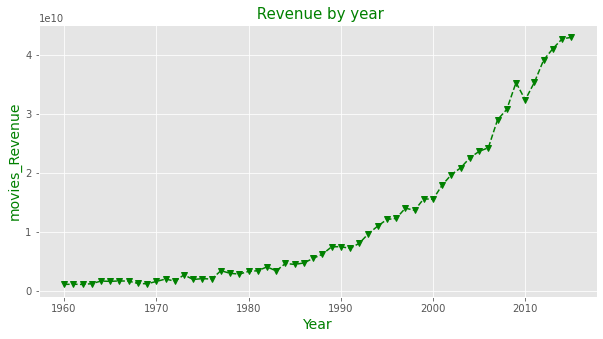

In [39]:
#visualize movies_revenue_by_year
#choose the style "ggplot" to the figure
#choose the figure size 
#make a  plot to display movies_revenue_by_year by index in x_axis 
# display movies_revenue_by_year in y_axis
#give the plot green color , "v" marker ,"--" linestyle 
#give a title to the figure and green color 
#give a label to x_axis and y_axis and green color
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(movies_revenue_by_year.index, movies_revenue_by_year, color='green',marker="v",linestyle="--")
plt.title(' Revenue by year', fontsize = 15, color='green')
plt.xlabel('Year', fontsize=14, color='green')
plt.ylabel('movies_Revenue', fontsize=14, color='green')

###### we notice that Over the years,movies are making a higher revenue

### What is the relationship of the year in which the film was released and its count  ?

In [40]:
#display movies_number_by_year
movies_number_by_year= movie.groupby('release_year').count()['id']
movies_number_by_year.head()

release_year
1960-01-01    32
1961-01-01    31
1962-01-01    32
1963-01-01    34
1964-01-01    42
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

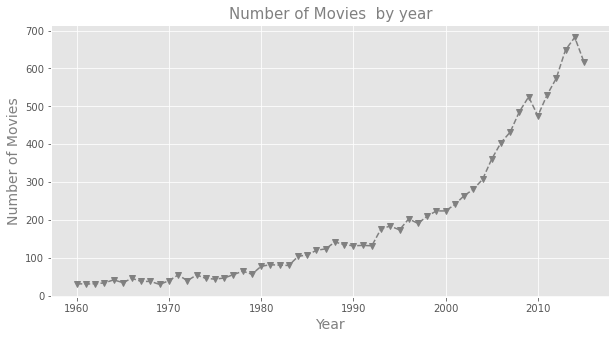

In [41]:
#visualize movies_number_by_year
#choose the style "ggplot" to the figure
#choose the figure size 
#make a  plot to display movies_number_by_year by index in x_axis 
# display movies_number_by_year in y_axis
#give the plot gray color , "v" marker ,"--" linestyle 
#give a title to the figure and gray color 
#give a label to x_axis and y_axis and gray color
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(movies_number_by_year.index, movies_number_by_year, color='gray',marker="v",linestyle="--")
plt.title('Number of Movies  by year', fontsize = 15,color='gray')
plt.xlabel('Year', fontsize=14,color='gray')
plt.ylabel('Number of Movies', fontsize=14,color='gray')

###### we notice that Over the years, the number of movies has increased

### what is the relationship between movie budget and revenue ?

In [42]:
#calculate the mean of the budget_adj and revenue_adj by the release_year
budgets = movie.groupby('release_year').mean()['budget_adj']
revenues = movie.groupby('release_year').mean()['revenue_adj']

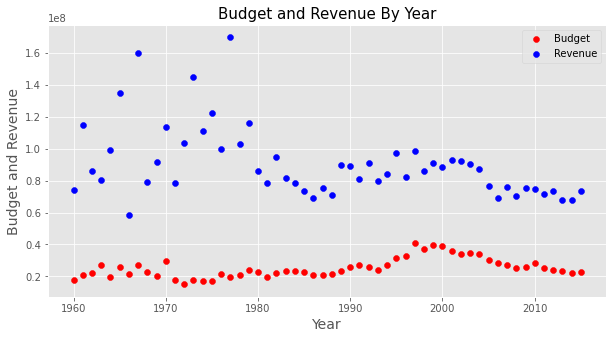

In [43]:
#visualize the relation  ship between budgets and revenues
#choose the style "ggplot" to the figure
#choose the figure size 
#make a scatter plot to display budgets with the color red and revenues by the color blue in x_axis 
# display budgets index wand revenues index in y_axis
#give a title to the figure
#give a label to x_axis and y_axis
#give a legend
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.scatter(budgets.index, budgets, color='red', label = 'Budget')
plt.scatter(revenues.index, revenues, color='blue', label = 'Revenue')
plt.title('Budget and Revenue By Year' , fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Budget and Revenue', fontsize=14)
plt.legend()
plt.show()

###### we notice that movies revenue in                    "blue" must be greater than movies budget in "red"

### What are the top 10 movies ?

In [44]:
#sort data by the column "popularity" Desending 
#select the frist 10 row by the columns ["original_title","runtime","cast","director","popularity"]
most_popular_movies=movie.sort_values(by=["popularity"],ascending=False)
most_popular_movies[0:10][["original_title","runtime","cast","director","popularity"]]

,original_title,runtime,cast,director,popularity
0,Jurassic World,124.0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763
1,Mad Max: Fury Road,120.0,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,28.419936
629,Interstellar,169.0,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,24.949134
630,Guardians of the Galaxy,121.0,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,14.311205
2,Insurgent,119.0,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,13.112507
631,Captain America: The Winter Soldier,136.0,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,12.971027
1329,Star Wars,121.0,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,12.037933
632,John Wick,101.0,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,11.422751
3,Star Wars: The Force Awakens,136.0,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,11.173104
633,The Hunger Games: Mockingjay - Part 1,123.0,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,10.739009


Text(0, 0.5, 'movie title')

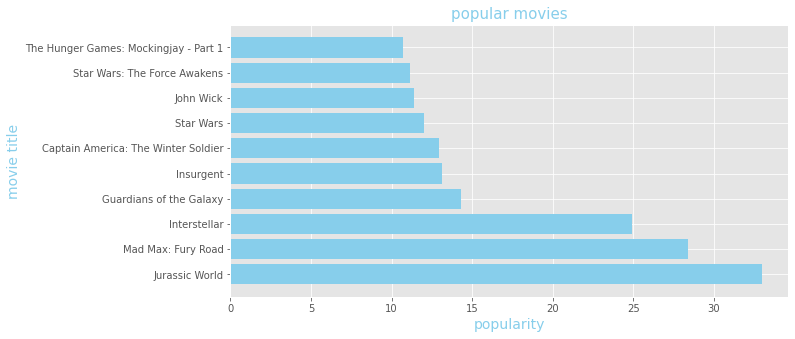

In [45]:
#visualize popular movies
#choose the style "ggplot" to the figure
#choose the figure size 
#make a hrizontal bar that take the "original title" of high_popularity in x_axis 
#and take "popularity" of high_profit in y_axis
#give a title to the figure
#give a label to x_axis and y_axis
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.barh(most_popular_movies[0:10]["original_title"],most_popular_movies[0:10]["popularity"] , color='skyblue')
plt.title('popular movies', fontsize = 15,color='skyblue')
plt.xlabel('popularity', fontsize=14,color='skyblue')
plt.ylabel('movie title', fontsize=14,color='skyblue')

###### we notice that "Jurassic World" is the most popular movie 

### which movies  have achieved high profits ? and Who is the director and cast?

In [46]:
#sort data by the column "profit" Desending 
#select the frist 10 row by the columns ["original_title","runtime","cast","director","profit"]
high_profit=movie.sort_values(by=["profit"],ascending=False)
high_profit[0:10][["original_title","runtime","cast","director","profit"]]

,original_title,runtime,cast,director,profit
1386,Avatar,162.0,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2.544506e+09
3,Star Wars: The Force Awakens,136.0,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,1.868178e+09
5231,Titanic,194.0,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,1.645034e+09
0,Jurassic World,124.0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.363529e+09
4,Furious 7,137.0,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,1.316249e+09
4361,The Avengers,143.0,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,1.299558e+09
3374,Harry Potter and the Deathly Hallows: Part 2,130.0,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,1.202818e+09
14,Avengers: Age of Ultron,141.0,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,1.125036e+09
5422,Frozen,102.0,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,1.124219e+09
8094,The Net,114.0,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,1.084280e+09


Text(0, 0.5, 'movie title')

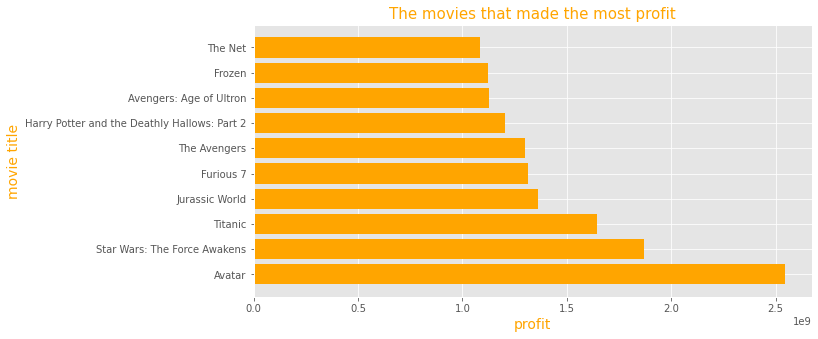

In [47]:
#visualize popular movies generes
#choose the style "ggplot" to the figure
#choose the figure size 
#make a hrizontal bar that take the "original title" of high_profit in x_axis 
#and take "profit" of high_profit in y_axis
#give a title to the figure
#give a label to x_axis and y_axis
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.barh(high_profit[0:10]["original_title"],high_profit[0:10]["profit"] , color='orange')
plt.title('The movies that made the most profit', fontsize = 15,color='orange')
plt.xlabel('profit', fontsize=14,color='orange')
plt.ylabel('movie title', fontsize=14,color='orange')

###### we notice that "Avatar"  is the most movie made profits

### which movies have achieved high revenues ? and Who is the director and cast?

In [48]:
#sort data by the column "revenue" Desending 
#select the frist 10 rowby the columns ["original_title","cast","director","revenue"]
high_revenue=movie.sort_values(by=["revenue"],ascending=False)
high_revenue[0:10][["original_title","cast","director","revenue"]]

,original_title,cast,director,revenue
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,2.781506e+09
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2.068178e+09
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,1.845034e+09
4361,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,1.519558e+09
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,1.513529e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,1.506249e+09
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,1.405036e+09
3374,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,1.327818e+09
5422,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,1.274219e+09
5425,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,1.215440e+09


Text(0, 0.5, 'movie title')

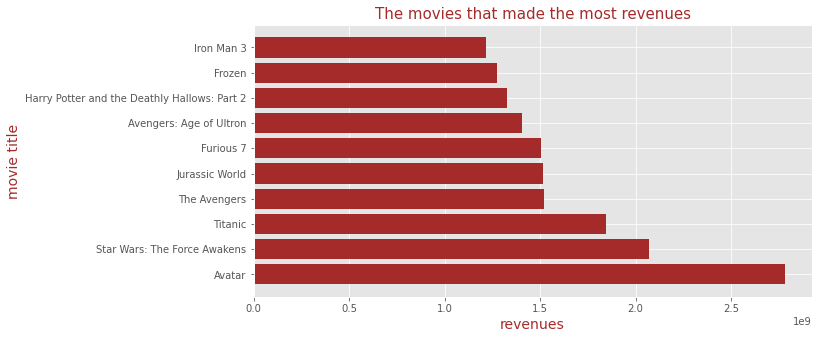

In [49]:
#visualize popular movies generes
#choose the style "ggplot" to the figure
#choose the figure size 
#make a hrizontal bar that take the "original title" of high_revenue in x_axis 
#and take "revenue" of high_revenue in y_axis
#give a title to the figure
#give a label to x_axis and y_axis
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.barh(high_revenue[0:10]["original_title"],high_revenue[0:10]["revenue"] , color='brown')
plt.title('The movies that made the most revenues', fontsize = 15,color='brown')
plt.xlabel('revenues', fontsize=14,color='brown')
plt.ylabel('movie title', fontsize=14,color='brown')

###### we notice that "Avatar"  is the most movie made revenues

### What are the most popular genres of movies?

In [50]:
#sort the data according to sample numbers , selecting the top 5
df=movie.groupby(["genres"])[["id"]].count().sort_values(by="id",ascending=False)[0:5]
df_new=movie[movie["genres"].isin(df.index.values.tolist())]
#display data frame that contain "mean" , "std" of movie genr
pd.DataFrame(df_new.groupby(["genres"])["budget"].describe().loc[:,["mean","std"]])

,mean,std
genres,,
Comedy,1.827347e+07,1.439197e+07
Comedy|Drama,1.584403e+07,1.161455e+07
Documentary,1.354292e+07,3.961124e+06
Drama,1.634677e+07,1.337152e+07
Drama|Romance,1.663113e+07,1.252150e+07


genres
Comedy           706
Comedy|Drama     280
Documentary      274
Drama            710
Drama|Romance    289
Name: id, dtype: int64

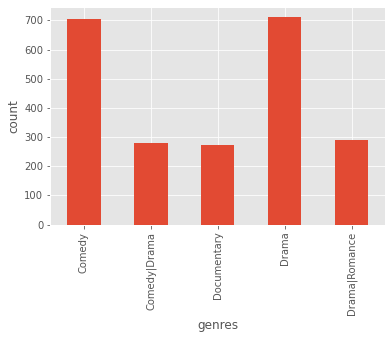

In [51]:
#count and plot the number of each movie genr 
df_new.groupby(["genres"])["id"].count().plot(kind="bar").set_ylabel("count")
df_new.groupby(["genres"])["id"].count()

###### we notice that "Drama" movie gener is the most popular gener of movies genres

<a id='conclusions'></a>
# Conclusions

> **Tip**:) 0) the question " How much profits that each movie achieve? " tell us the Profits made by each movie

> **Tip**:) 1)  the question " What is the relationship of the year in which the film was released and its profit ? " we notice in the graph that shows us " the relationship of the year in which the movie was released and its profit " that Over the years,movies are making a higher profit           

> **Tip**: 2) the question " What is the relationship of the year in which the film was released and its budget ? "  we notice in the graph that shows us " the relationship of the year in which the movie was released and its                        budget " that Over the years,spending on movies become more

> **Tip**: 3) the question " What is the relationship of the year in which the film was released and its revenue ? " we notice in the graph that shows us " the relationship of the year in which the movie was released and its revenues "               that Over the years,movies are making a higher revenues

> **Tip**: 4) the question " What is the relationship of the year in which the film was released and its count  ? " we notice in the graph that shows us " the relationship of the year in which the movie was released and its count "                  that Over the years, the number of movies has increased

> **Tip**: 5) the question " what is the relationship between movie budget and revenue ?" we notice in the graph that shows us " the relationship between movie budget and revenue " that movies revenue in                    "blue" must be greater than movies budget in "red"

> **Tip**: 6)the question " What are the top 10 movies ? " we notice in the graph that shows us " the popular movies " that the movie  "Jurassic World" is the most popular movie and "James Cameron" is the most popular movie

> **Tip**: 7) the question "  which movies  have achieved high profits ? and Who is the director and cast? " we notice that the movie "Avatar",the director"James Cameron" and the cast " Sam Worthington|Zoe Saldana|Sigourney Weaver| "  and  in the graph that shows us " The movies that made the most profit " that the movie "Avatar" is the most movie made profits
    

> **Tip**: 8) the question " which movies have achieved high revenues ? and Who is the director and cast? "we notice that the movie "Avatar", the director"James Cameron" and the cast " Sam Worthington|Zoe Saldana|Sigourney Weaver| "  and in the graph that shows us " The movies that made the most revenues " that the movie "Avatar" is the most movie made revenues
    

> **Tip**: 9) the question "  What are the most popular genres of movies? " we notice that in the graph that the "Drama" movie gener is the greater between the other genres 

###### From my analysis to this data I conclude that :
###### To make a successful movie :
###### 1_the director must be "James Cameron"
###### 2_the run time must be from 100 : 160 minutes
###### 3_the movie genr may be Drama or comedy 

##### Data Limitations : All results are limited to the underlying data set, and since no presented statistics have been performed, the results can only be treated as indices and are not generalizable. Moreover, one has to take into account that many entries in the data set have been removed due to data loss

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'tmdb_Movies.ipynb'])

1